# Laboratorium 10 - Eksperyment Obliczeniowy
 Jędrzej Warczyński
 14.05.2023 

# Abstract
Niniejsza praca skupia się na badaniu efektywności solvera firmy IBM umożliwiającego rozwiązywanie problemów programowania liniowego. Eksperyment polega na badaniu czasu potrzebnego do rozwiązania poniżej sformułowanego zadania programowania liniowego w zależności od konfiguracji parametrów tegoż zadania, które kontrolują wielkość instancji, jak i jej stopień skomplikowania.

## Sformułowanie problemu

1. zmienne decyzyjne
   - $x_{ij}$ - zmienna określająca czy i-ty statek wykonuje j-ty manewr 
2. Stałe
   - $c_{ijkl}$ - występowanie knfliktu statku i-tego wykonującego manewr j-ty ze stakiem k-tym wykonującym manewr l-ty

1. Zminimalizować 1
   - funkcja celu jest stała, poszukujemy tylko rozwiązania dopuszczalnego
   
2. Ograniczenia
   
   1. 
      - $
        \forall_i\sum_{j=1}^{7}x_{ij} = 1  
        $
      - samolot może wykonać tylko jeden manewr   
   2. 
      - $
        \forall_i\forall_j\forall_k\forall_k(x_{ij}c_{ijkl} + x_{kl}c_{ijkl}) \leq 1 \
        $
      - brak konfliktów 
   3.
      - $x_{ij} \in \{0,1\}$
      - zmienn decyzyjne są binarne


1. zmienne decyzyjne
   - $x_{ij}$ - zmienna określająca czy i-ty statek wykonuje j-ty manewr 
2. Stałe
   - $c_{ijkl}$ - występowanie knfliktu statku i-tego wykonującego manewr j-ty ze stakiem k-tym wykonującym manewr l-ty

1. Zminimalizować 1
   - funkcja celu jest stała, poszukujemy tylko rozwiązania dopuszczalnego
   
2. Ograniczenia
   
   1. 
      - $
        \forall_i\sum_{j=1}^{7}x_{ij} = 1  
        $
      - samolot może wykonać tylko jeden manewr   
   2. 
      - $
        \forall_i\forall_j\forall_k\forall_k(x_{ij}c_{ijkl} + x_{kl}c_{ijkl}) \leq 1 \
        $
      - brak konfliktów 
   3.
      - $x_{ij} \in \{0,1\}$
      - zmienn decyzyjne są binarne


## Generacja instancji
Do generowania instancji wykorzystano poniższą funkcję, przyjmującą trzy parametry. Parametr planes określa ilość statków powietrznych uwzględnionych w problemie dekonfliktacji, parametr m określa liczbę dozwolonych manewrów dla każdego statku powietrznego, natomiast parametr fill określa procentowy stopień ilości kolizji w problemie.  
Funkcja generuje losową macierz symetryczną o zadanych parametrach.


In [1]:
def generate_conflict_matrix(planes, maneuvers, fill):
    num_entries = planes* maneuvers
    num_ones = int(num_entries * (num_entries - 1) / 2 * fill / 100)
    indices = np.random.choice(num_entries * (num_entries - 1) // 2,
                               size=num_ones, replace=False)
    matrix = np.zeros((num_entries, num_entries))
    matrix[np.triu_indices(num_entries, 1)[0][indices],
           np.triu_indices(num_entries, 1)[1][indices]] = 1
    matrix = matrix + matrix.T
    return matrix

## Badanie czasu rozwiązania w funkcji ilości statków powietrznych
Na potrzeby testu wygenerowano po pięć instancji problemu dla każdej konfiguracji danych wejściowych problemu i obliczono średnie czasy obliczeń, a także ilość znalezionych rozwiązań. Wartość pięć oznacza, że każde z 5 instancji posiadało rozwiązanie dopuszczalne, zero oznacza, że żadna instancja nie posiadała rozwiązania dopuszczalnego.  
W celu zbadania czasu rozwiązania w funkcji ilości statków powietrznych w problemie przyjęto stałą ilość manewrów równą 10 oraz stałą gęstość kolizji równą 5%. Otrzymano 15 punktów pomiarowych. Pierwszy punkt pomiarowy odpowiada 10 statkom powietrznym, z każdym kolejnym pomiarem liczba statków powietrznych zwiększała się o 10.   
Kolorem niebieskim oznaczono liczbę rozwiązań dla danej konfiguracji 5 instancji testowych. Oś znajduję się z prawej strony wykresu.  
Kolorem pomarańczowym przedstawiono wykres czasu obliczeń solvera (oś z lewej strony).  
Kolorem zielonym przedstawiono dopasowany do czasu obliczeń wielomian stopnia 2.

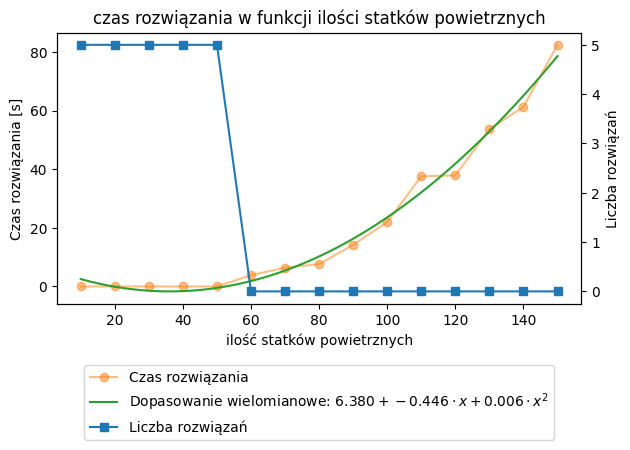

,Średni czas roziwązania,Liczba rozwiązań
ilość statków powietrznych,,
10.0,0.00000,5.0
20.0,0.01500,5.0
30.0,0.00375,5.0
40.0,0.01525,5.0
50.0,0.01550,5.0
60.0,3.84775,0.0
70.0,6.43375,0.0
80.0,7.62125,0.0
90.0,14.21475,0.0


In [2]:
from visualization import show_planes_plot
show_planes_plot()

## Wnioski i obserwacje
1.  Pierwsza z obserwacji dotyczy generacji instancji. Wraz ze wzrostem wielkości instancji, mimo tej samej gęstości kolizji, co raz mniej wygenerowanych instancji posiada rozwiązanie.
Dodatkowo można zauważyć, że zmiana jest skokowa. Do wielkości instancji 50 statków powietrznych wszystkie 5 z wylosowanych instancji o określonych parametrach posiada rozwiązanie, natomiast po przekroczeniu tej wielkości żadna z 5 instancji nie posiada rozwiązania. Wzbudza to pewne wątpliwości co do poprawności generowania instancji, jednak zostało to szczegółowo zbadane i nie znaleziono nieprawidłowości w procedurze do generowania instancji.
2.  Druga obserwacja dotyczy czasu rozwiązania problemu wraz ze wzrostem wielkości instancji. Z wykresu wynika, że wraz z liniowym wzrostem ilości statków powietrznych w problemie , czas rozwiązania rośnie kwadratowo. Dopasowana funkcja kwadratowa dobrze odwzorowuje trend danych. Dodatkowo można spostrzec, że współczynniki tej paraboli są małe.


## Badanie czasu rozwiązania w funkcji liczby manewrów
Wygenerowano po pięć instancji problemu dla każdej konfiguracji danych wejściowych problemu i obliczono średnie czasy obliczeń, a także ilość znalezionych rozwiązań.   
W celu zbadania czasu rozwiązania w funkcji liczby manewrów w problemie przyjęto stałą ilość statków powietrznych równą 20 oraz stałą gęstość kolizji równą 5%. Otrzymano 15 punktów pomiarowych. Pierwszy punkt pomiarowy odpowiada 10 manewrom, z każdym kolejnym pomiarem liczba manewrów rosła o 10.  
Kolorem niebieskim oznaczono liczbę rozwiązań dla danej konfiguracji 5 instancji testowych. Oś znajduję się z prawej strony wykresu.  
Kolorem pomarańczowym przedstawiono wykres średniego czasu obliczeń solvera (oś z lewej strony).  
Kolorem zielonym przedstawiono dopasowany do czasu obliczeń wielomian stopnia 2.


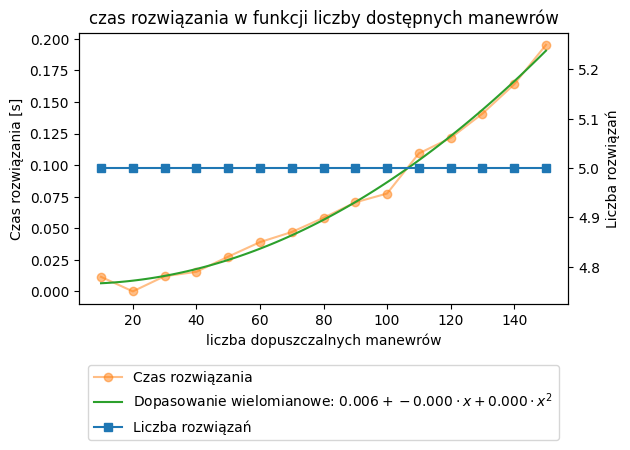

,Średni czas roziwązania,Liczba rozwiązań
liczba dopuszczalnych manewrów,,
10.0,0.01150,5.0
20.0,0.00000,5.0
30.0,0.01200,5.0
40.0,0.01550,5.0
50.0,0.02750,5.0
60.0,0.03900,5.0
70.0,0.04700,5.0
80.0,0.05825,5.0
90.0,0.07050,5.0


In [3]:
from visualization import show_maneuvers_plot
show_maneuvers_plot()

## Wnioski i obserwacje
1.	Zarówno jak w przypadku zwiększania wielkości instancji poprzez wzrost liczby samolotów, czas obliczeń rośnie kwadratowo, co jest widoczne po dobrym dopasowaniu się wielomianu stopnia drugiego do danych. 
2.	Ciekawym faktem wydaję się jednak być sytuacja związana z liczbą rozwiązań dla instancji testowych. W obu eksperymentach gęstość konfliktów była ustawiona na 5%, przy czym, gdy w poprzednim eksperymencie zwiększano liczbę statków powietrznych, to od pewnej wielkości tego parametru liczba rozwiązań spadła do 0, natomiast w tym eksperymencie liczba rozwiązań utrzymuje się na poziomie 5, a więc wszystkie wygenerowane instancje posiadały rozwiązanie dopuszczalne.


## Badanie czasu rozwiązania w funkcji gęstości konfliktów
W tej części eksperymentu pomiarowego wykonano kilka prób pomiarowych z różnymi konfiguracjami parametrów ze względu na zaobserwowane wyniki. Na poniższych wykresach zamieszczono wyniki dwóch takich prób. W pierwszej próbie ustalono liczbę statków powietrznych jako stałą wartość równa 20, liczba manewrów również była stała i wynosiła 10. Pierwszy punkt pomiarowy odnosił się do gęstości konfliktów równej 15%, każdy kolejna instancja posiadała gęstość konfliktów o 2% większą.   
<br>
W drugiej próbie zmieniono parametry problemu. Zwiększono ilość manewrów do 20, a gęstość konfliktów zmieniała się od 15% do 25% z krokiem 1. Zwiększono również liczbę instancji dla pojedynczej konfiguracji parametrów zadania na podstawie, której była liczona ilość rozwiązań oraz średni czas rozwiązania z 5 do 10.
<br>
Wykonano również kilka podobnych eksperymentów badających czasy rozwiązania w funkcji gęstości konfliktów z innymi przyjętymi parametrami ilości statków powietrznych i liczby manewrów, modyfikując również początkową gęstość konfliktów jak i tempo wzrostu tego parametru.
Wyniki dla każdej z tych prób były bardzo podobne.  
<br> Tak jak można zauważyć na poniższych dwóch wykresach, do pewnej wielkości konfliktów solver rozwiązuje problem w liniowym czasie, a liczba rozwiązań jest maksymalna tzn. wszystkie instancje posiadają rozwiązanie. Po przekroczeniu pewnej wartości gęstości konfliktów liczba rozwiązań delikatnie spada , a czas rozwiązania tych instancji gwałtownie rośnie. Przy kolejnej instancji, liczba rozwiązań spada do 0 a czas rozwiązania jest maksymalny z pośród wszystkich instancji. Kolejne instancje również nie posiadają rozwiązania, jednak solver jest w stanie bardzo szybko to stwierdzić , w związku z czym czas rozwiązywania kolejnych instancji jest znów liniowy i zbliżony do czasu obliczeń dla instancji, z mniejszą gęstością konfliktów.


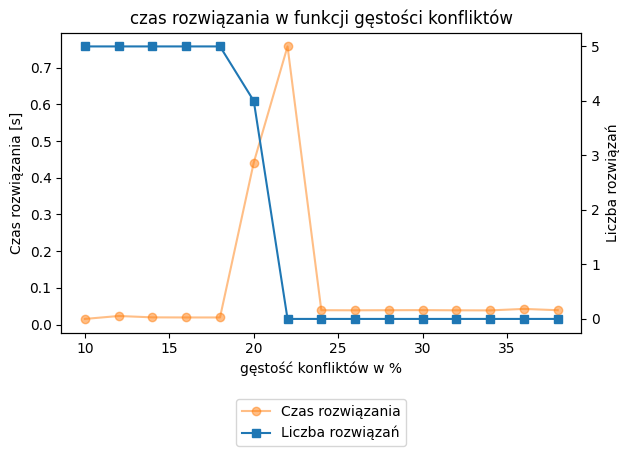

,Średni czas roziwązania,Liczba rozwiązań
procentowa gęstość konfliktów,,
10.0,0.01550,5.0
12.0,0.02350,5.0
14.0,0.01975,5.0
16.0,0.01950,5.0
18.0,0.01950,5.0
20.0,0.44150,4.0
22.0,0.75775,0.0
24.0,0.03925,0.0
26.0,0.03900,0.0


In [4]:
from visualization import show_density_plot
show_density_plot()

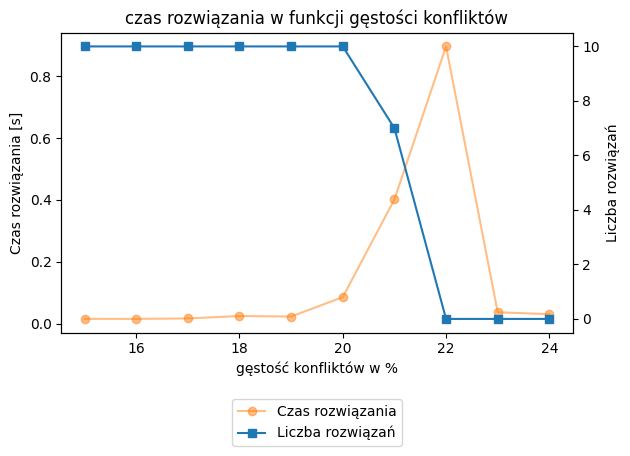

,Średni czas roziwązania,Liczba rozwiązań
procentowa gęstość konfliktów,,
15,0.0160,10.0
16,0.0157,10.0
17,0.0173,10.0
18,0.0251,10.0
19,0.0234,10.0
20,0.0861,10.0
21,0.4016,7.0
22,0.8956,0.0
23,0.0372,0.0


In [5]:
from visualization import show_density_plot2
show_density_plot2()

## Wnioski Końcowe
1.	Jednym z istotnych wniosków wydaję się być fakt, iż liczba statków powietrznych znacznie bardziej wpływa na złożoność problemu, a tym samym na czas obliczeń niż pozostałe parametry. Porównując przedziały czasy oblicze solvera dla wszystkich 3 eksperymentów, można zauważyć, że dla eksperymentu badającego wpływ liczby statków powietrznych maksymalny czas rozwiązania wynosił ponad 82s sekundy, podczas, gdy dla eksperymentu badającego wpływ ilości dostępnych manewrów była to wartość niecałych 0.2 sekundy oraz około 0.9 sekundy w przypadku eksperymentu z gęstością konfliktów
2. Z analizy wynika, że solver firmy IBM jest bardzo efektywnym narzędziem do rozwiązywania problemów programowania liniowego. Nawet bardzo duże instancje problemu rozwiązuje w krótkim czasie. 